In [1]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [2]:
nelems = 20
degree = 1
tol  = 1e-5
ndims = 1

In [3]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [4]:
# prepare residual
ns = function.Namespace()
ns.pi = numpy.pi
ns.x = geom
ns.basis = domain.basis('discont', degree=degree)
ns.u = 'basis_n ?lhs_n'
ns.C = 10

ns.f = ' (2 pi)^2 sin( 2 pi x_0 )'
ns.dg = ' 2 pi '
ns.g = '0'

# ns.f = ' (2 pi)^2 cos( 2 pi x_0 )'
# ns.dg = ' 0 '
# ns.g = '1'

In [5]:
# construct residual and inertia vector
res = domain.integral('basis_n,0 u_,0 - basis_n f' @ ns, geometry=ns.x, degree=5)
res -= domain.interfaces.integral('-[basis_n] n_0 {u_,0} - {basis_n,0} n_0 [u]' @ ns, geometry=ns.x, degree=5)

# C0 continuity residual
res -= domain.interfaces.integral('C [basis_n] n_0 [u]' @ ns, geometry=ns.x, degree=5)

# boundary

# sqr = domain.boundary.integral('(u - g)^2' @ ns, geometry=ns.x, degree=degree*2)
# cons = solver.optimize('lhs', sqr, droptol=1e-15)
res += domain.boundary.integral('- basis_n (0.5 (dg + u_,0)) n_0' @ ns, geometry=ns.x, degree=degree*2)
res += domain.boundary.integral(' C basis_n,0 (g - u) n_0' @ ns, geometry=ns.x, degree=degree*2)

Here comes the Jacobian
(40, 40)
[[-190.    0.  -10. ...,    0.    0.    0.]
 [ 190.  -10.   30. ...,    0.    0.    0.]
 [ -10.   30.  -10. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,  -10.   30.  -10.]
 [   0.    0.    0. ...,   30.  -10.  190.]
 [   0.    0.    0. ...,  -10.    0. -190.]]
[ 3.03874722 -0.20467554 -0.40029919 -0.49216145 -0.65856886 -0.73147117
 -0.85237323 -0.89917939 -0.96274137 -0.97886967 -0.97886967 -0.96274137
 -0.89917939 -0.85237323 -0.73147117 -0.65856886 -0.49216145 -0.40029919
 -0.20467554 -0.10284544  0.10284544  0.20467554  0.40029919  0.49216145
  0.65856886  0.73147117  0.85237323  0.89917939  0.96274137  0.97886967
  0.97886967  0.96274137  0.89917939  0.85237323  0.73147117  0.65856886
  0.49216145  0.40029919  0.20467554 -3.03874722]
solve > solver returned with residual 2e-14


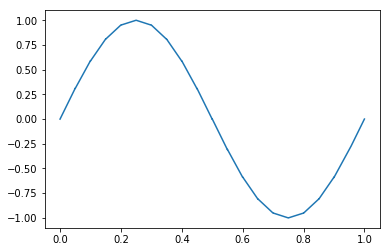

In [6]:
# find lhs such that res == 0 and substitute this lhs in the namespace
# lhs = solver.solve_linear('lhs', res, constrain=cons)
lhs = solver.solve_linear('lhs', res)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
plt.plot(x, u)
# plt.ylim(-2,2)